In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import utils
from tensorflow.keras import layers
from tensorflow.keras import datasets
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
cifar_mnist = datasets.cifar10

(train_images, train_labels), (test_images, test_labels) = cifar_mnist.load_data()

/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


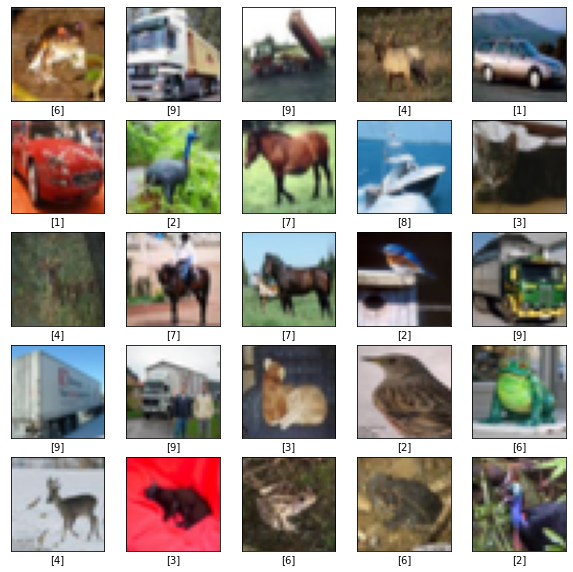

In [5]:
class_names = [
    'Airplane',
    'Car',
    'Bird',
    'Cat',
    'Deer',
    'Dog',
    'Frog',
    'Horse',
    'Ship',
    'Truck'
]

plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(train_labels[i])

plt.show()

In [6]:
batch_size = 64
num_classes = 10
epochs = 10

train_images = train_images.astype('float32')
train_images = train_images / 255

test_images = test_images.astype('float32')
test_images = test_images / 255

train_labels = utils.to_categorical(train_labels, num_classes)
test_labels = utils.to_categorical(test_labels, num_classes)

In [7]:
model = keras.Sequential([
    Conv2D(32, kernel_size=(3, 3), padding='same', input_shape=train_images.shape[1:],
           activation=tf.nn.relu),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Conv2D(64, kernel_size=(3, 3), padding='same', activation=tf.nn.relu),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Flatten(),
    Dense(64, activation=tf.nn.relu),
    Dropout(0.25),
    Dense(num_classes, activation=tf.nn.softmax)                    
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 8, 8, 64)          0

In [8]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [9]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(
    train_images, train_labels,
    epochs=epochs,
    validation_data=(test_images, test_labels),
    shuffle=True,
    callbacks=[early_stopping]
)

Epoch 1/10
1563/1563 [==============================] - 107s 68ms/step - loss: 1.6251 - accuracy: 0.4051 - val_loss: 1.3290 - val_accuracy: 0.5155
Epoch 2/10
1563/1563 [==============================] - 100s 64ms/step - loss: 1.3138 - accuracy: 0.5266 - val_loss: 1.1357 - val_accuracy: 0.6059
Epoch 3/10
1563/1563 [==============================] - 98s 63ms/step - loss: 1.2075 - accuracy: 0.5684 - val_loss: 1.0486 - val_accuracy: 0.6285
Epoch 4/10
1563/1563 [==============================] - 97s 62ms/step - loss: 1.1297 - accuracy: 0.6002 - val_loss: 1.0143 - val_accuracy: 0.6587
Epoch 5/10
1563/1563 [==============================] - 97s 62ms/step - loss: 1.0839 - accuracy: 0.6144 - val_loss: 0.9510 - val_accuracy: 0.6658
Epoch 6/10
1563/1563 [==============================] - 102s 65ms/step - loss: 1.0403 - accuracy: 0.6289 - val_loss: 0.9440 - val_accuracy: 0.6772
Epoch 7/10
1563/1563 [==============================] - 97s 62ms/step - loss: 1.0076 - accuracy: 0.6430 - val_loss: 0.904

In [10]:
  loss, acc = model.evaluate(test_images, test_labels)

  print("/nLoss: {}, Acc: {}".format(loss, acc))

313/313 [==============================] - 5s 17ms/step - loss: 0.8565 - accuracy: 0.7040
/nLoss: 0.8565011024475098, Acc: 0.7039999961853027


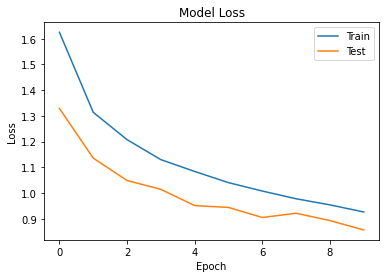

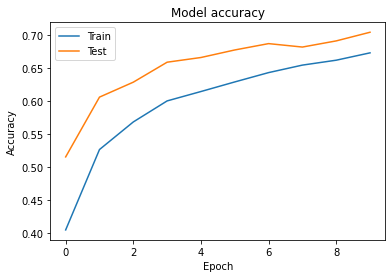

In [18]:
def plt_show_loss(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc=0)

def plt_show_acc(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch') 
    plt.legend(['Train', 'Test'], loc=0)

plt_show_loss(history)
plt.show()

plt_show_acc(history)
plt.show()

In [19]:
predictions = model.predict(test_images)

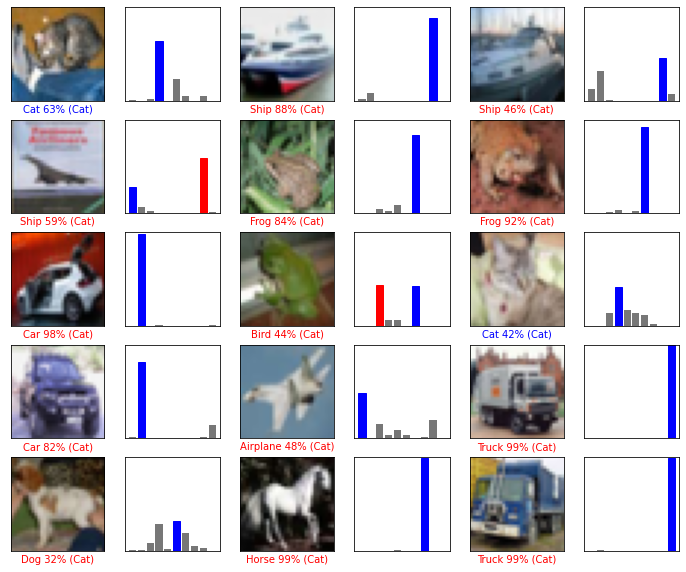

In [20]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_labels, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == np.argmax(true_label):
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                       100*np.max(predictions_array),
                                       class_names[np.argmax(true_label)]),
                                       color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[np.argmax(true_label)].set_color('blue')

num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)

plt.show()